In [35]:
library(tidyverse)
library(gtools)

Warning message:
"package 'gtools' was built under R version 4.3.1"


## Preprocess

In [279]:
ds <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/navigation_events.csv")
ds_grade <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/additional/gradebook.csv")
ds_enroll <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/additional/enrollments.csv")
ds_ass <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/additional/assignments.csv")
ds_disc <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/additional/discussions.csv")
ds2 <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/selected_asset_name_df.csv")
Ass <- unique(ds2$event__object_extensions_asset_name)  
Ass <- gsub("Assignment 1:", "Assignment 1",Ass)

#Only run one time
ds_enroll <- ds_enroll %>% 
    filter(user_id != "LEARNER_48") %>% 
    mutate(
    id1 = as.integer(str_extract(user_id, "[0-9]+"))
      ) %>% 
    arrange(id1)

ds_grade <- ds_grade[-1,]
ds_grade <- ds_grade[-1,]
ds_grade <- ds_grade %>% 
    filter(Student != "LEARNER_48") %>% 
    mutate(
    id = as.integer(str_extract(Student, "[0-9]+"))
      ) %>% 
    arrange(id) 

ds$event_time <- as.Date(ds$event_time, format="%Y-%m-%d %H:%M:%OS", tz="UTC")
ds_ass$due_at <- as.Date(ds_ass$due_at, format="%Y-%m-%d %H:%M:%OS", tz="UTC")

ds_ass <- ds_ass %>% 
    select(due_at,name) %>% 
    filter(name %in%  Ass)

[1] 36

In [127]:
ds_ge <- cbind(ds_grade,ds_enroll) %>% 
    select(-id1)
ds_ge$Current.Score <- as.integer(ds_ge$Current.Score)
head(ds_ge)

,Student,Assignment.1..c81f04547a95da2a7b88054ef491b7c4.,Assignment.2..a4dc11e7e79361fc5886a9078aac66b8.,Assignment.3..option.A...811d93ea379b5cdd5a19f1b5dbab88cd.,Assignment.3..option.B...df8d1f1ff3f48fdc24a278b40c5f45cc.,Assignment.3..option.C...bb971b36c1578cede00150acda89aa99.,Assignment.3..option.D...f1ad954cd2cddda6e17f6fc225d1aa3e.,Participation.grade..Formative..not.included.in.final.grade...5965e0b0c712861d0efdd9be54572114.,Assignment.1.Current.Score,Assignment.2.Current.Score,Assignment.3.Current.Score,Participation...engagement.Current.Score,Current.Score,id,user_id,type,last_activity_at,last_attended_at,total_activity_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>
1,LEARNER_1,79,84,,,73,,9,79,84,73,90,80,1,LEARNER_1,StudentEnrollment,2033-05-26 03:10:40+00:00,NA,985351
2,LEARNER_2,93,85,,,,95,6,93,85,95,60,84,2,LEARNER_2,StudentEnrollment,2033-09-15 13:24:28+00:00,NA,152876
3,LEARNER_3,94,92,,,82,,9,94,92,82,90,89,3,LEARNER_3,StudentEnrollment,2033-04-27 00:46:59+00:00,NA,209706
4,LEARNER_4,88,76,75,,,,10,88,76,75,100,82,4,LEARNER_4,StudentEnrollment,2033-05-08 08:56:27+00:00,NA,675638
5,LEARNER_5,91,82,84,,,,10,91,82,84,100,88,5,LEARNER_5,StudentEnrollment,2033-05-27 04:17:06+00:00,NA,177844
6,LEARNER_6,94,94,,84,,,10,94,94,84,100,92,6,LEARNER_6,StudentEnrollment,2033-05-10 10:22:54+00:00,NA,426200


In [215]:
ds_grade1 <- ds_grade %>% 
    select(Assignment.1..c81f04547a95da2a7b88054ef491b7c4.,
          Assignment.2..a4dc11e7e79361fc5886a9078aac66b8.,
          Assignment.3..option.A...811d93ea379b5cdd5a19f1b5dbab88cd.,
          Assignment.3..option.B...df8d1f1ff3f48fdc24a278b40c5f45cc.,
          Assignment.3..option.C...bb971b36c1578cede00150acda89aa99.,
          Assignment.3..option.D...f1ad954cd2cddda6e17f6fc225d1aa3e.,
          id)
colnames(ds_grade1) = c(Ass,'id')

ds_grade1 <- ds_grade1 %>% 
    pivot_longer(cols = starts_with("Assignment"), names_to = "Assignment Name", values_to = "grade") 
head(ds_grade1)

id,Assignment Name,grade
<int>,<chr>,<chr>
1,Assignment 1,79
1,Assignment 2,84
1,Assignment 3 (option A),
1,Assignment 3 (option B),
1,Assignment 3 (option C),73
1,Assignment 3 (option D),


In [232]:
head(ds_disc)

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0
2,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02+00:00,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0
3,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0
4,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0
5,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0
6,INSTRUCTOR,"[""Instructor""]",2033-01-29 11:26:11+00:00,b4ef4eadc997992bfab83b11b50a3771,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,1566,2


In [247]:
ds_disc1 <- ds_disc %>% 
    select(actor_id,
          discussion_topic_title,
          post_message_length,
          count_of_likes) %>% 
    filter(grepl('LEARNER', actor_id))  %>% 
    group_by(actor_id) %>% 
    summarise(total_length = sum(post_message_length),
             total_like = sum(count_of_likes)) %>% 
    mutate(id = as.integer(str_extract(actor_id, "[0-9]+"))) %>% 
    arrange(id)  %>% 
    select(-actor_id)
    
    
head(ds_disc1)

total_length,total_like,id
<int>,<int>,<int>
33617,3,1
32704,9,2
39331,10,3
99054,18,4
89431,6,5
128557,24,6


In [257]:
ds1 <- ds %>% 
    mutate(event__object_extensions_asset_name = gsub("Assignment 1:", "Assignment 1", event__object_extensions_asset_name)) %>% 
    group_by(actor_id,event__object_extensions_asset_name) %>% 
    summarise(start_time = min(event_time),
             end_time = max(event_time)) %>% 
    filter(grepl('LEARNER', actor_id)) %>% 
    filter(grepl('Assignment', event__object_extensions_asset_name)) %>% 
    mutate(id = as.integer(str_extract(actor_id, "[0-9]+"))) %>% 
    arrange(id) %>% 
    filter(event__object_extensions_asset_name %in%  Ass) %>% 
    left_join(ds_ass,by = c("event__object_extensions_asset_name" = "name")) %>% 
    mutate(duration = ifelse(end_time > due_at, due_at - start_time, end_time - start_time)) %>% 
    left_join(ds_grade1,by = c("id" = "id", "event__object_extensions_asset_name" = "Assignment Name"))

ds1$grade <- as.numeric(ds1$grade)

head(ds1,3)

`summarise()` has grouped output by 'actor_id'. You can override using the `.groups` argument.


actor_id,event__object_extensions_asset_name,start_time,end_time,id,due_at,duration,grade
<chr>,<chr>,<date>,<date>,<int>,<date>,<dbl>,<dbl>
LEARNER_1,Assignment 1,2033-01-16,2033-04-26,1,2033-02-05,20,79
LEARNER_1,Assignment 2,2033-01-19,2033-04-26,1,2033-03-05,45,84
LEARNER_1,Assignment 3 (option A),2033-03-19,2033-04-24,1,2033-04-09,21,NA


In [309]:
ds_grade2 <- ds_grade %>% 
    select(id, Current.Score)

In [314]:
ds2 <- ds1 %>% 
    group_by(id) %>% 
    summarise(mean_duration = mean(duration),
             mean_grade = mean(grade,na.rm = T)) %>% 
    left_join(ds_disc1, by = c('id' = 'id')) %>% 
    left_join(ds_grade2, by = c('id' = 'id')) %>% 
    mutate(mean_grade = Current.Score) %>% 
    select(-Current.Score)

ds2$mean_grade <- as.numeric(ds2$mean_grade)

head(ds2)

id,mean_duration,mean_grade,total_length,total_like
<int>,<dbl>,<dbl>,<int>,<int>
1,33.80000,80.9,33617,3
2,50.33333,84.6,32704,9
3,13.66667,89.0,39331,10
4,38.16667,82.9,99054,18
5,39.50000,88.0,89431,6
6,24.60000,92.2,128557,24


In [315]:
cor(ds2$total_like,ds2$mean_grade,use='complete.obs')

[1] 0.6204276

hour,n
<chr>,<int>
00,1234
01,1266
02,1790
03,1878
04,2611
05,3230
06,3606
07,3443
08,3721


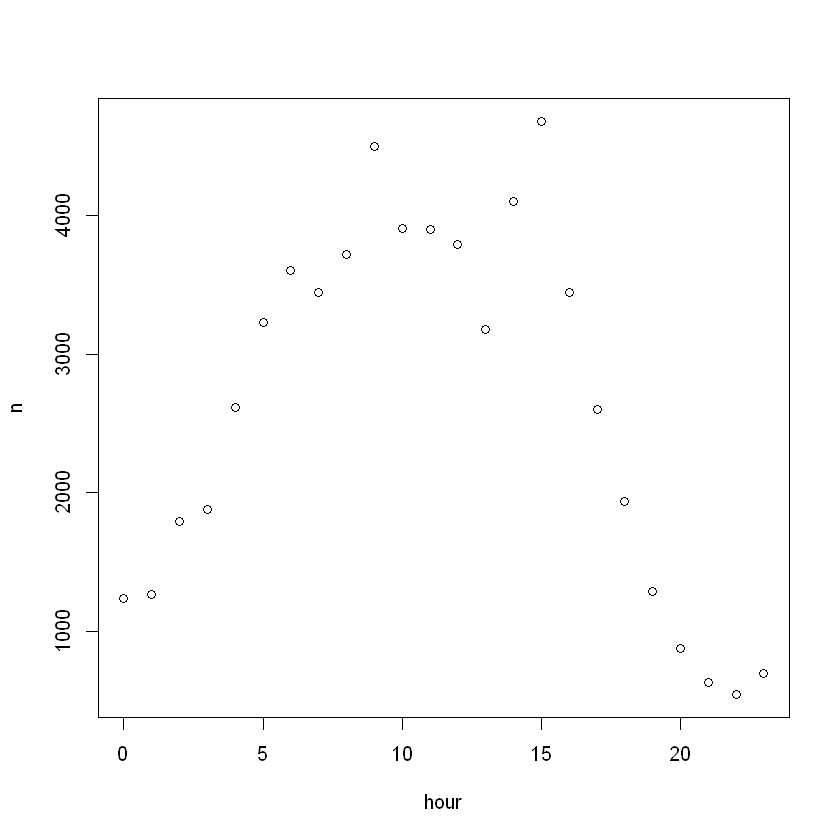

In [338]:
dsf <- read.csv("D:/OneDrive - UBC/桌面/LA Hackthon/hack-la-2023/TeamOne/data/hackathon_alternate_data/navigation_events.csv")
dsf$event_time  <- as.POSIXct(dsf$event_time, format="%Y-%m-%d %H:%M:%OS", tz="UTC")
dsf$hour <- format(dsf$event_time, "%H")

ds_hour <- dsf %>% 
    group_by(hour) %>% 
    summarise(n = n())

ds_hour
plot(ds_hour)

In [342]:
# Calculate the total number of active hours per student
student_hours <- dsf %>%
  group_by(actor_id) %>%
  summarise(active_hours = n())

# Join the active hours back to the main dataframe
dsf <- dsf %>%
  left_join(student_hours, by = "actor_id")

# Calculate the number of actions per active hour for each student
dsf <- dsf %>%
  group_by(actor_id, hour) %>%
  summarise(actions_count = n(),
            actions_per_active_hour = actions_count / active_hours)

# Calculate the weighted average of actions per active hour for each hour
hourly_activity_weighted <- dsf %>%
  group_by(hour) %>%
  summarise(weighted_avg_actions = sum(actions_per_active_hour, na.rm = TRUE))

# View the result
hourly_activity_weighted

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly."
`summarise()` has grouped output by 'actor_id', 'hour'. You can override using the `.groups` argument.


hour,weighted_avg_actions
<chr>,<dbl>
00,100.51980
01,129.99125
02,157.28761
03,119.19196
04,225.39223
05,291.22628
06,312.03117
07,264.98002
08,403.08485


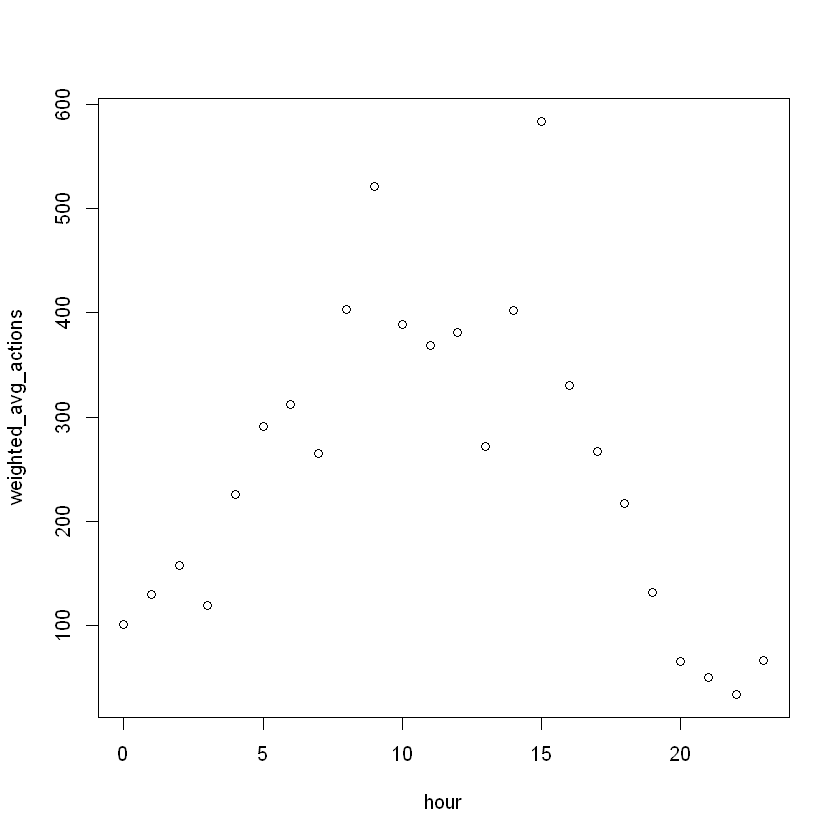

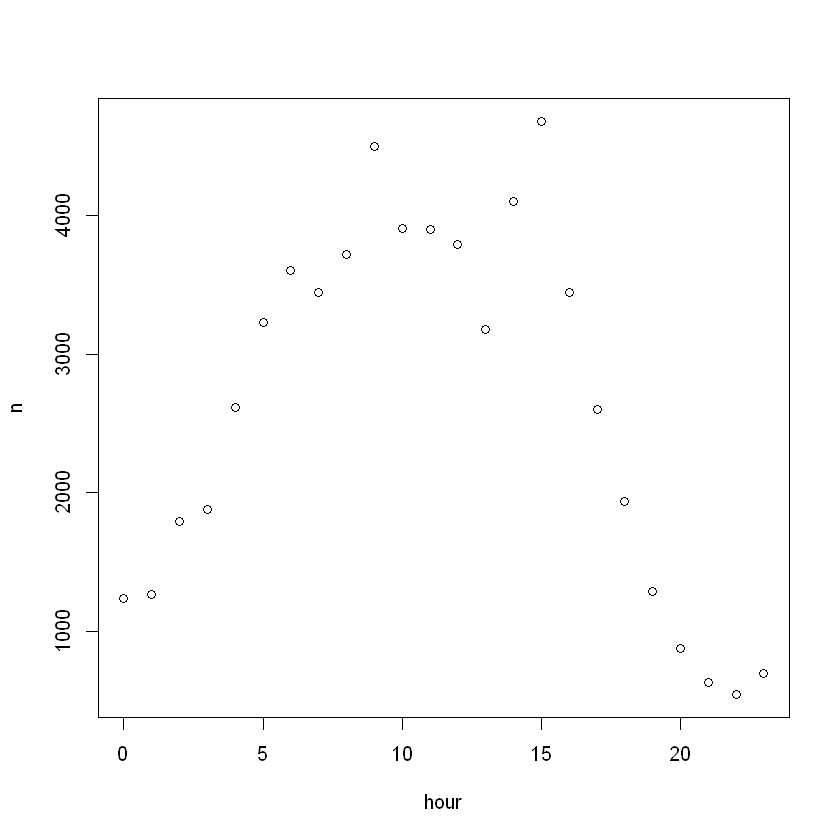

In [344]:
plot(hourly_activity_weighted)
plot(ds_hour)

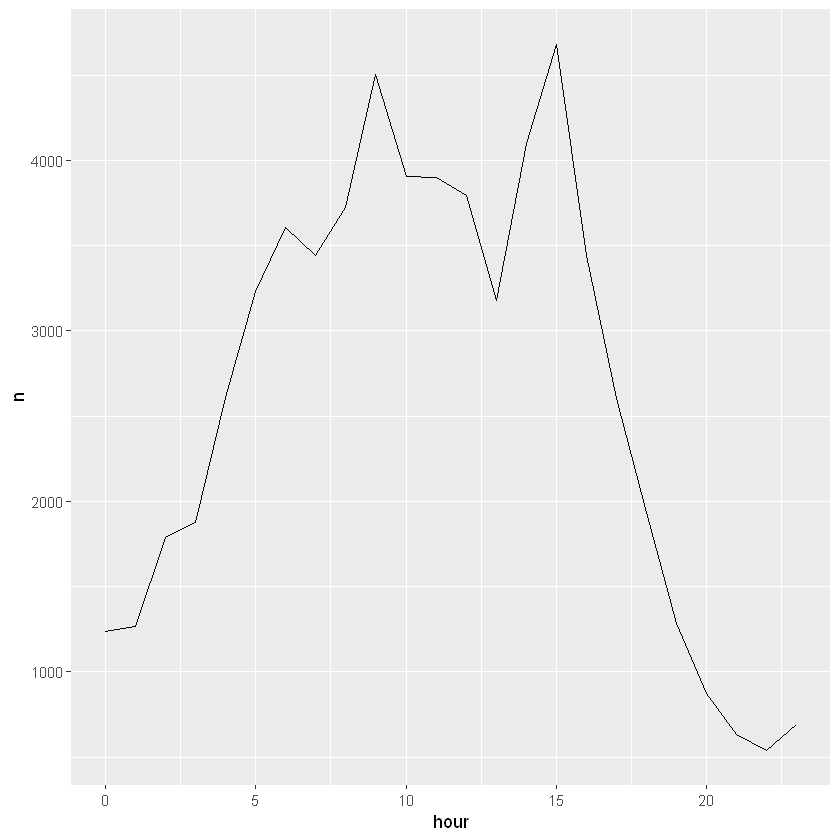

In [352]:
ds_hour$hour <- as.numeric(ds_hour$hour)
ds_hour %>% 
    ggplot(aes(hour,n)) + 
    geom_line()

# Model

In [353]:
m <- lm(mean_grade ~ mean_duration + total_length + total_like + total_length:total_like,ds2)
summary(m)


Call:
lm(formula = mean_grade ~ mean_duration + total_length + total_like + 
    total_length:total_like, data = ds2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.096 -3.238  1.396  2.544  6.992 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.912e+01  2.628e+00  26.298  < 2e-16 ***
mean_duration            1.964e-02  5.319e-02   0.369  0.71476    
total_length             1.954e-04  6.345e-05   3.080  0.00460 ** 
total_like               1.035e+00  2.776e-01   3.727  0.00087 ***
total_length:total_like -1.101e-05  3.947e-06  -2.789  0.00939 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.595 on 28 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.5637,	Adjusted R-squared:  0.5014 
F-statistic: 9.044 on 4 and 28 DF,  p-value: 8.056e-05
